## Expresso Churn Prediction

In this checkpoint, I am going to work on the **'Expresso churn'** dataset that was provided as part of Expresso Churn Prediction Challenge hosted by Zindi platform.

**Dataset description:** Expresso is an African telecommunications services company that provides telecommunication services in two African markets: Mauritania and Senegal. The data describes 2.5 million Expresso clients with more than 15 behaviour variables in order to predict the clients' churn probability.

➡️ Dataset link

https://i.imgur.com/OQKLgVy.png

**Instructions**

1. Install the necessary packages
2. Import you data and perform basic data exploration phase
- Display general information about the dataset
- Create a pandas profiling reports to gain insights into the dataset
- Handle Missing and corrupted values
- Remove duplicates, if they exist
- Handle outliers, if they exist
- Encode categorical features
3. Based on the previous data exploration train and test a machine learning classifier
4. Create a streamlit application (locally)
5. Add input fields for your features and a validation button at the end of the form
6. Import your ML model into the streamlit application and start making predictions given the provided features values

#### Importing necessary libraries

In [1]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Loading the dataset

In [4]:
df = pd.read_csv("Expresso_churn_dataset.csv")

In [5]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [6]:
df.shape

(2154048, 19)

#### Sampling the dataset

In [8]:
# Sample 50000 random rows from the cleaned DataFrame
df_sampled = df.sample(n=50000, random_state=42)

#### Overview of the dataset

In [10]:
df_sampled.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
566939,4361fb4fad11445ce7ec1ee054f41de5deba6fef,DAKAR,K > 24 month,4200.0,8.0,4199.0,1400.0,14.0,1.0,314.0,132.0,NaN,NaN,NaN,NO,20,On net 200F=Unlimited _call24H,3.0,0
620796,49c7c0d15acb8c92f9f4d8d3342385e996a9d292,SAINT-LOUIS,K > 24 month,1000.0,2.0,1000.0,333.0,2.0,NaN,59.0,3.0,NaN,NaN,NaN,NO,17,"On-net 500=4000,10d",1.0,0
299703,23b4832c1ebee58bfdd2cc0c3886523d93f03c97,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,1
1051494,7d0e2093cc4ca7fa9c50d68b539922a26a85306e,KOLDA,K > 24 month,5300.0,15.0,5150.0,1717.0,18.0,NaN,1482.0,88.0,NaN,NaN,NaN,NO,50,On net 200F=Unlimited _call24H,7.0,0
527353,3eac0fdfcf454d2857f26b6d41479033b7bb7366,TAMBACOUNDA,K > 24 month,200.0,1.0,399.0,133.0,3.0,32.0,7.0,0.0,NaN,NaN,NaN,NO,39,"Data: 100 F=40MB,24H",1.0,0


In [11]:
df_sampled.shape

(50000, 19)

In [12]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 566939 to 172383
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         50000 non-null  object 
 1   REGION          30210 non-null  object 
 2   TENURE          50000 non-null  object 
 3   MONTANT         32392 non-null  float64
 4   FREQUENCE_RECH  32392 non-null  float64
 5   REVENUE         33082 non-null  float64
 6   ARPU_SEGMENT    33082 non-null  float64
 7   FREQUENCE       33082 non-null  float64
 8   DATA_VOLUME     25282 non-null  float64
 9   ON_NET          31702 non-null  float64
 10  ORANGE          29165 non-null  float64
 11  TIGO            20055 non-null  float64
 12  ZONE1           3938 non-null   float64
 13  ZONE2           3114 non-null   float64
 14  MRG             50000 non-null  object 
 15  REGULARITY      50000 non-null  int64  
 16  TOP_PACK        28988 non-null  object 
 17  FREQ_TOP_PACK   28988 non-null

#### Summary Statistics

In [15]:
df_sampled.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,32392.000000,32392.000000,33082.000000,33082.000000,33082.000000,25282.000000,31702.000000,29165.000000,20055.000000,3938.000000,3114.000000,50000.000000,28988.000000,50000.000000
mean,5469.437639,11.441899,5454.273532,1818.095369,13.882655,3165.063444,272.177497,96.227876,22.759561,7.807517,7.926140,27.968360,9.202705,0.189620
std,6942.554713,13.150927,6966.827514,2322.274337,14.572489,10365.649363,838.800559,207.621663,56.787674,33.112243,42.439091,22.292203,12.003244,0.392004
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.000000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,253.000000,26.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.000000
75%,7249.250000,15.000000,7281.000000,2427.000000,19.000000,2875.750000,158.000000,99.000000,21.000000,3.000000,5.000000,51.000000,12.000000,0.000000
max,189300.000000,114.000000,165166.000000,55055.000000,91.000000,560933.000000,20837.000000,4743.000000,1739.000000,597.000000,1346.000000,62.000000,320.000000,1.000000


#### Checking for missing values and duplicates

In [17]:
df_sampled.isnull().sum()

user_id               0
REGION            19790
TENURE                0
MONTANT           17608
FREQUENCE_RECH    17608
REVENUE           16918
ARPU_SEGMENT      16918
FREQUENCE         16918
DATA_VOLUME       24718
ON_NET            18298
ORANGE            20835
TIGO              29945
ZONE1             46062
ZONE2             46886
MRG                   0
REGULARITY            0
TOP_PACK          21012
FREQ_TOP_PACK     21012
CHURN                 0
dtype: int64

##### Replacing missing values

In [19]:
df_sampled['MONTANT'].fillna(df_sampled['MONTANT'].median(), inplace=True)
df_sampled['FREQUENCE_RECH'].fillna(df_sampled['FREQUENCE_RECH'].median(), inplace=True)
df_sampled['REVENUE'].fillna(df_sampled['REVENUE'].median(), inplace=True)
df_sampled['ARPU_SEGMENT'].fillna(df_sampled['ARPU_SEGMENT'].median(), inplace=True)
df_sampled['FREQUENCE'].fillna(df_sampled['FREQUENCE'].median(), inplace=True)
df_sampled['DATA_VOLUME'].fillna(df_sampled['DATA_VOLUME'].median(), inplace=True)
df_sampled['ON_NET'].fillna(df_sampled['ON_NET'].median(), inplace=True)
df_sampled['ORANGE'].fillna(df_sampled['ORANGE'].median(), inplace=True)
df_sampled['TIGO'].fillna(df_sampled['TIGO'].median(), inplace=True)
df_sampled['ZONE1'].fillna(df_sampled['ZONE1'].median(), inplace=True)
df_sampled['ZONE2'].fillna(df_sampled['ZONE2'].median(), inplace=True)
df_sampled['FREQ_TOP_PACK'].fillna(df_sampled['FREQ_TOP_PACK'].median(), inplace=True)

In [20]:
# Replace missing values for categorical columns with the mode
df_sampled['REGION'].fillna(df_sampled['REGION'].mode()[0], inplace=True)
df_sampled['TOP_PACK'].fillna(df_sampled['TOP_PACK'].mode()[0], inplace=True)


In [21]:
df_sampled.isnull().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [22]:
df_sampled.duplicated().sum()

0

no duplicates in the dataset cool!

###### Churn Distribution Across Region

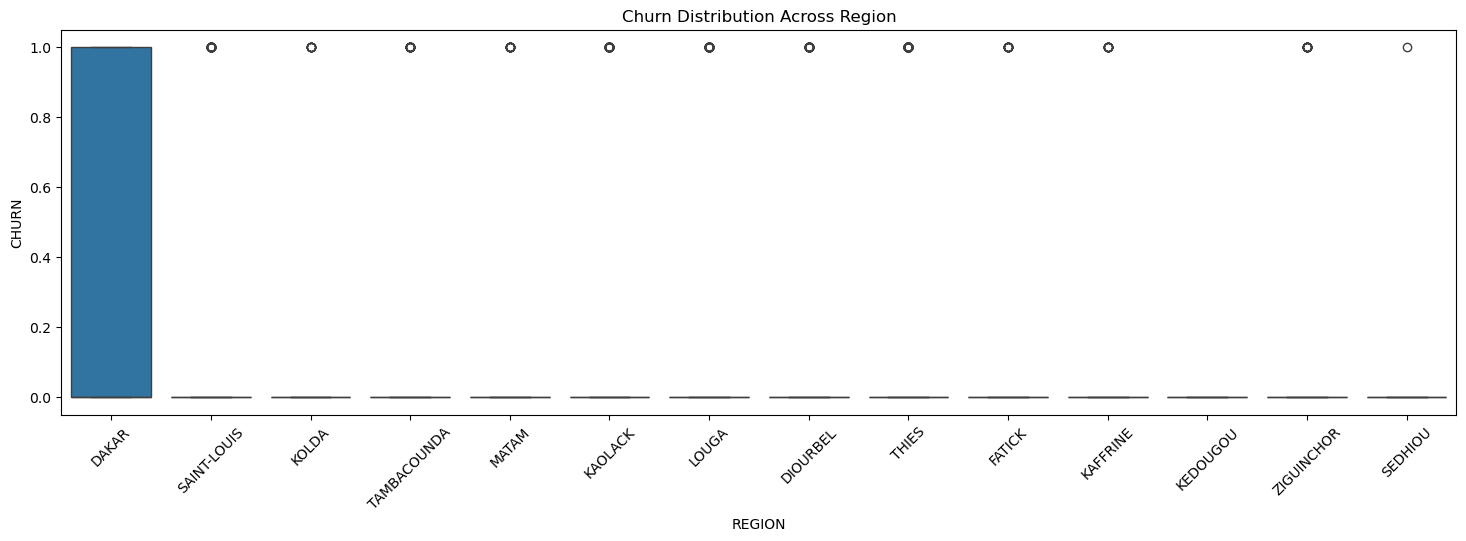

In [25]:
plt.figure(figsize=(18, 5))
sns.boxplot(x='REGION', y='CHURN', data=df_sampled)
plt.title('Churn Distribution Across Region')
plt.xticks(rotation=45)
plt.show()


###### plot features against CHURN and identify data points that are far away from the bulk of the data.

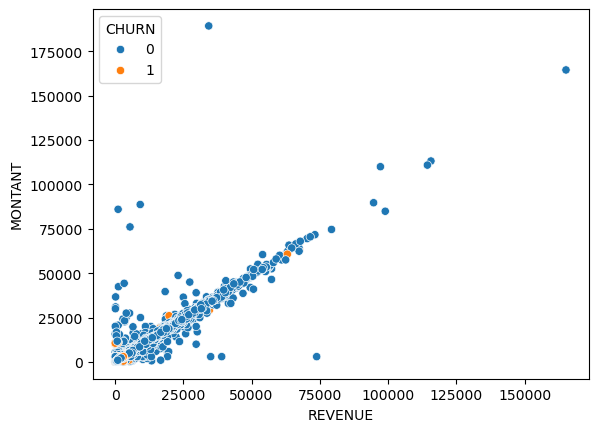

In [28]:
sns.scatterplot(x='REVENUE', y='MONTANT', data=df_sampled, hue='CHURN')
plt.show()

In [29]:
from scipy import stats
z_scores = stats.zscore(df_sampled['MONTANT'])
df_sampled[(z_scores > 3) | (z_scores < -3)]


,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
558839,4269a566bba2774af389f1c38ac9be53131d8db9,DAKAR,K > 24 month,26000.0,36.0,28583.0,9528.0,48.0,19797.0,782.0,177.0,6.0,1.0,9.0,NO,61,"Data:490F=1GB,7d",26.0,0
820149,617dcf4696150a0036db8b1799959fec7ad7d1ab,TAMBACOUNDA,K > 24 month,52500.0,30.0,57326.0,19109.0,36.0,169.0,23.0,8.0,6.0,5.0,140.0,NO,51,"Data:200F=Unlimited,24H",2.0,0
1605639,bed0a97ca2cc08b2445f0a0f638bbc14ee2c659d,DAKAR,K > 24 month,22000.0,68.0,22098.0,7366.0,69.0,4699.0,5569.0,556.0,49.0,1.0,2.0,NO,62,On net 200F=Unlimited _call24H,50.0,0
1058656,7de46e4ccc16d92d1635cd34ec15b19c2cb9ae33,KOLDA,K > 24 month,23000.0,40.0,24000.0,8000.0,42.0,253.0,1120.0,717.0,6.0,1.0,2.0,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,47.0,0
112370,0d6aaff61ca6ccc33777aa4e73c82813f02147c4,SAINT-LOUIS,K > 24 month,30900.0,56.0,30759.0,10253.0,56.0,0.0,3037.0,313.0,80.0,1.0,2.0,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403544,a6d9c0154cebb9a6954e42784a6762095e53ea50,SAINT-LOUIS,K > 24 month,23250.0,50.0,23375.0,7792.0,69.0,4410.0,1727.0,458.0,9.0,1.0,2.0,NO,62,Mixt 250F=Unlimited_call24H,60.0,0
1223958,918b184824c0236bcc547758b2031d3e68b96176,DAKAR,K > 24 month,32200.0,84.0,31382.0,10461.0,77.0,29278.0,320.0,116.0,30.0,1.0,2.0,NO,62,"Data: 200 F=100MB,24H",83.0,0
691680,522f67cb0733173dcc6efc4587e7e52595611751,DAKAR,G 12-15 month,30000.0,63.0,31600.0,10533.0,74.0,25995.0,1494.0,540.0,6.0,1.0,2.0,NO,62,Jokko_Daily,27.0,0
949121,70e5880ead9193c4b2e0d9dd17221b8c53176e02,LOUGA,K > 24 month,23200.0,36.0,24201.0,8067.0,37.0,253.0,1406.0,337.0,4.0,1.0,2.0,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,26.0,0


All users with these outlier MONTANT values have not churned (CHURN = 0). This may suggest that higher MONTANT values are correlated with retention.

In [31]:
df_sampled['REGION'].value_counts()

REGION
DAKAR          31732
THIES           4227
SAINT-LOUIS     2752
LOUGA           2319
KAOLACK         2241
DIOURBEL        1525
TAMBACOUNDA     1227
KAFFRINE        1001
KOLDA            900
FATICK           839
MATAM            639
ZIGUINCHOR       516
SEDHIOU           59
KEDOUGOU          23
Name: count, dtype: int64

In [32]:
df_sampled['TENURE'].value_counts()

TENURE
K > 24 month     47416
I 18-21 month     1072
H 15-18 month      606
G 12-15 month      350
J 21-24 month      307
F 9-12 month       193
E 6-9 month         40
D 3-6 month         16
Name: count, dtype: int64

In [33]:
# Mean encoding for TENURE based on REVENUE
mean_encoded = df_sampled.groupby('TENURE')['REVENUE'].mean()
df_sampled['TENURE_encoded'] = df_sampled['TENURE'].map(mean_encoded)

In [34]:
df_sampled.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,TENURE_encoded
566939,4361fb4fad11445ce7ec1ee054f41de5deba6fef,DAKAR,K > 24 month,4200.0,8.0,4199.0,1400.0,14.0,1.0,314.0,132.0,6.0,1.0,2.0,NO,20,On net 200F=Unlimited _call24H,3.0,0,4648.063734
620796,49c7c0d15acb8c92f9f4d8d3342385e996a9d292,SAINT-LOUIS,K > 24 month,1000.0,2.0,1000.0,333.0,2.0,253.0,59.0,3.0,6.0,1.0,2.0,NO,17,"On-net 500=4000,10d",1.0,0,4648.063734
299703,23b4832c1ebee58bfdd2cc0c3886523d93f03c97,DAKAR,K > 24 month,3000.0,6.0,3000.0,1000.0,9.0,253.0,26.0,29.0,6.0,1.0,2.0,NO,2,All-net 500F=2000F;5d,5.0,1,4648.063734
1051494,7d0e2093cc4ca7fa9c50d68b539922a26a85306e,KOLDA,K > 24 month,5300.0,15.0,5150.0,1717.0,18.0,253.0,1482.0,88.0,6.0,1.0,2.0,NO,50,On net 200F=Unlimited _call24H,7.0,0,4648.063734
527353,3eac0fdfcf454d2857f26b6d41479033b7bb7366,TAMBACOUNDA,K > 24 month,200.0,1.0,399.0,133.0,3.0,32.0,7.0,0.0,6.0,1.0,2.0,NO,39,"Data: 100 F=40MB,24H",1.0,0,4648.063734


In [35]:
# Selecting only numeric columns for correlation
numeric_df = df_sampled.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

In [36]:
correlation_matrix

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN,TENURE_encoded
MONTANT,1.000000,0.806455,0.971280,0.971280,0.786867,0.271479,0.364489,0.664053,0.450113,0.173309,0.243864,0.494465,0.761022,-0.146535,0.023853
FREQUENCE_RECH,0.806455,1.000000,0.816956,0.816956,0.951882,0.196882,0.438906,0.534065,0.373118,0.072711,0.058327,0.533596,0.871240,-0.169839,0.016104
REVENUE,0.971280,0.816956,1.000000,1.000000,0.805749,0.283102,0.372617,0.670859,0.453569,0.179752,0.168977,0.505896,0.776203,-0.151410,0.023436
ARPU_SEGMENT,0.971280,0.816956,1.000000,1.000000,0.805748,0.283102,0.372618,0.670860,0.453570,0.179751,0.168977,0.505896,0.776202,-0.151411,0.023436
FREQUENCE,0.786867,0.951882,0.805749,0.805748,1.000000,0.217760,0.421856,0.489337,0.338283,0.070210,0.081464,0.536502,0.839128,-0.157958,0.017437
DATA_VOLUME,0.271479,0.196882,0.283102,0.283102,0.217760,1.000000,0.007190,0.060169,0.034945,0.003437,0.018142,0.223921,0.158031,-0.074363,-0.009514
ON_NET,0.364489,0.438906,0.372617,0.372618,0.421856,0.007190,1.000000,0.256266,0.172021,0.033638,0.002698,0.296181,0.388764,-0.106976,0.009854
ORANGE,0.664053,0.534065,0.670859,0.670860,0.489337,0.060169,0.256266,1.000000,0.465091,0.066794,0.018110,0.327273,0.574603,-0.116886,0.017429
TIGO,0.450113,0.373118,0.453569,0.453570,0.338283,0.034945,0.172021,0.465091,1.000000,0.034720,0.014495,0.228290,0.396493,-0.082034,0.011156
ZONE1,0.173309,0.072711,0.179752,0.179751,0.070210,0.003437,0.033638,0.066794,0.034720,1.000000,0.013816,0.054060,0.090797,-0.021507,-0.001490


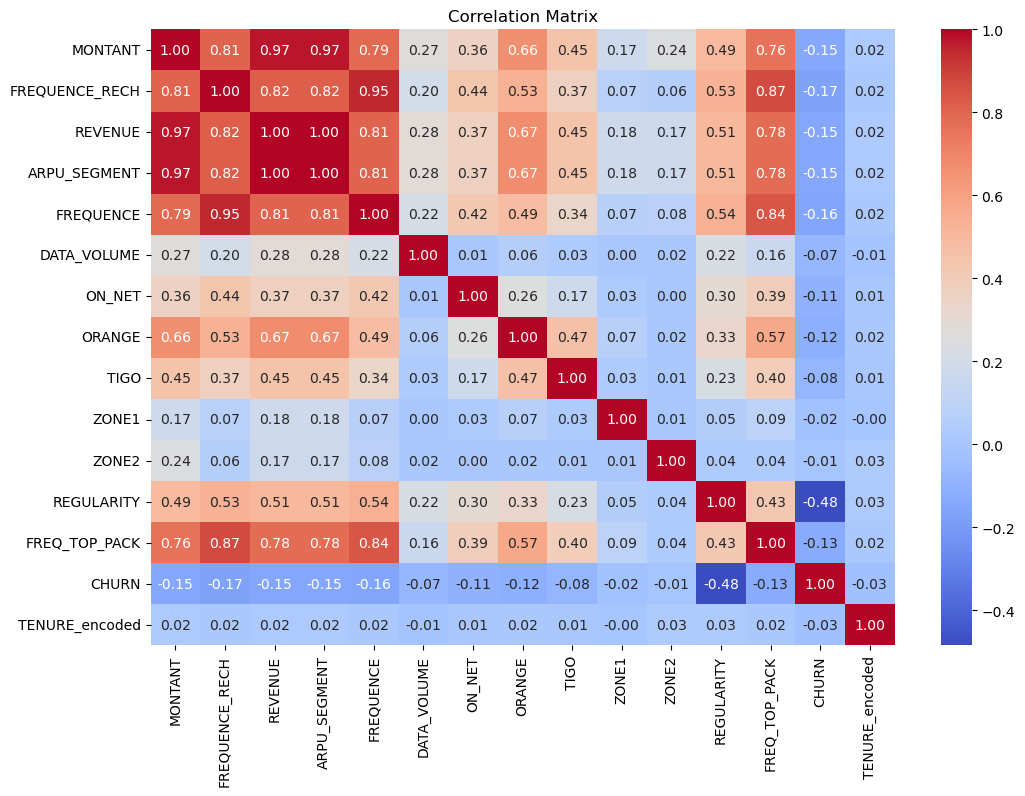

In [37]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Modelling

Selecting my features and splitting the data into training and test sets

In [40]:
# Split features (X) and target (y)
X = df_sampled.drop(columns=[ "CHURN", "TOP_PACK", "MRG", "user_id", "REGION", "TENURE"])
y = df_sampled['CHURN']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
print(X_train.columns)

Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK', 'TENURE_encoded'],
      dtype='object')


Scaling my data to ensure that each feature contributes equally to the distance calculations or the optimization process.

In [43]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

#### Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf_classifier = RandomForestClassifier(class_weight='balanced')

# Fit the model to the training data
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced')

In [47]:
# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score:
0.8331
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      8082
           1       0.55      0.74      0.63      1918

    accuracy                           0.83     10000
   macro avg       0.74      0.80      0.76     10000
weighted avg       0.86      0.83      0.84     10000

Confusion Matrix:
[[6905 1177]
 [ 492 1426]]


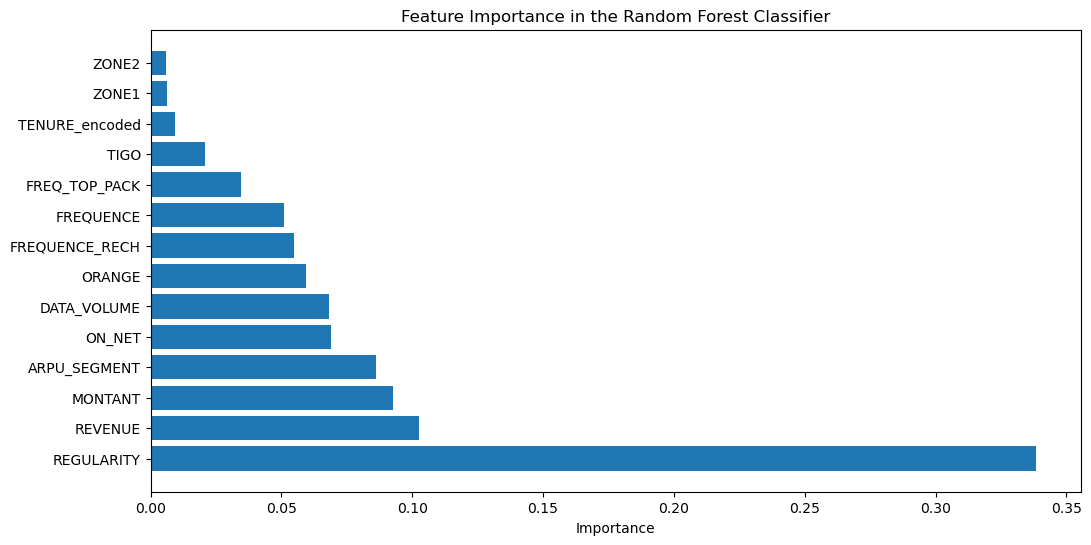

In [48]:
# Feature Importance
import matplotlib.pyplot as plt

feature_importances = rf_classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in the Random Forest Classifier')
plt.show()

Based on the feature Importance my new feature would be

'FREQUENCE_RECH', 'REVENUE', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'REGULARITY', 'FREQ_TOP_PACK'

### Light Gradient Boosting(LGBM)

In [55]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [57]:
X = df_sampled[['FREQUENCE_RECH', 'REVENUE', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'REGULARITY', 'FREQ_TOP_PACK']]
y = df_sampled['CHURN']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
lgbm_model = LGBMClassifier(n_estimators=100, early_stopping_rounds=10, eval_metric='auc', verbose=1)
# Fit the model
lgbm_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='auc')

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 7563, number of negative: 32437
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1353
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 8
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.189075 -> initscore=-1.456032
[LightGBM] [Info] Start training from score -1.456032
Training until valid

LGBMClassifier(early_stopping_rounds=10, eval_metric='auc', verbose=1)

In [61]:
# Make predictions
y_pred = lgbm_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

[LightGBM] [Warning] Unknown parameter: eval_metric


In [63]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      8082
           1       0.69      0.55      0.61      1918

    accuracy                           0.87     10000
   macro avg       0.79      0.75      0.77     10000
weighted avg       0.86      0.87      0.86     10000

Confusion Matrix:
[[7606  476]
 [ 857 1061]]


### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [67]:
log_model= LogisticRegression(penalty = 'l1', C = 0.5, solver = 'liblinear')
log_model.fit(X_train,y_train)

LogisticRegression(C=0.5, penalty='l1', solver='liblinear')

In [69]:
logy_pred = log_model.predict(X_test)

In [71]:
ACC = accuracy_score(logy_pred, y_test)
conf_mat = confusion_matrix(logy_pred, y_test)
class_report = classification_report(logy_pred, y_test)
print(ACC)
print(conf_mat)
print(class_report)

0.8618
[[7524  824]
 [ 558 1094]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      8348
           1       0.57      0.66      0.61      1652

    accuracy                           0.86     10000
   macro avg       0.75      0.78      0.76     10000
weighted avg       0.87      0.86      0.87     10000



##### LightGBM stands out as the best model overall based on my results. Here's why:

Accuracy: LightGBM has the highest accuracy (0.87), meaning it predicts both classes better overall.

Precision (Class 1): LightGBM also has the highest precision (0.69) for class 1, meaning it minimizes false positives better than the other models.

Balanced Performance: Although its recall (0.55) for class 1 is lower than Random Forest (0.75), it still provides a good balance between precision and recall, which is often desirable in many real-world cases where both overpredicting and underpredicting are costly.

Training Efficiency: LightGBM is also more efficient when it comes to training time and scaling to larger datasets, which can be beneficial as my project expands.

### saving my model

In [75]:
import joblib

In [80]:
joblib.dump(lgbm_model, 'expressoModel.pkl')

['expressoModel.pkl']